In [1]:
import pandas as pd
import numpy as np

In [2]:
dataframe = pd.read_csv('data.csv', header=0)

In [3]:
dataframe.head()

,Unnamed: 0,Date,Demand
0,96,1964-01,106.1
1,97,1964-02,102.1
2,98,1964-03,105.2
3,99,1964-04,101.0
4,100,1964-05,84.3


In [4]:
dataframe.columns

Index(['Unnamed: 0', 'Date', 'Demand'], dtype='object')

In [5]:
dataframe.drop('Unnamed: 0',
  axis='columns', inplace=True)

In [6]:
dataframe

,Date,Demand
0,1964-01,106.1
1,1964-02,102.1
2,1964-03,105.2
3,1964-04,101.0
4,1964-05,84.3
...,...,...
116,1973-09,129.4
117,1973-10,174.1
118,1973-11,197.0
119,1973-12,193.9


In [7]:
dataframe.shape

(121, 2)

In [8]:
dataframe['Date'].dtype

dtype('O')

In [9]:
dataframe["Date"]= pd.to_datetime(dataframe["Date"])


In [10]:
dataframe['Date'].dtype

dtype('<M8[ns]')

In [11]:
dataframe.describe()

,Demand
count,121.000000
mean,125.844628
std,23.407392
min,84.300000
25%,107.100000
50%,123.700000
75%,138.400000
max,197.000000


In [12]:
dataframe['year'] = dataframe['Date'].dt.year

In [13]:
dataframe['month'] = dataframe['Date'].dt.month

In [14]:
dataframe.head(5)

,Date,Demand,year,month
0,1964-01-01,106.1,1964,1
1,1964-02-01,102.1,1964,2
2,1964-03-01,105.2,1964,3
3,1964-04-01,101.0,1964,4
4,1964-05-01,84.3,1964,5


In [15]:
dataframe.index = dataframe['Date'] 

In [16]:
demand = dataframe['Demand']


In [17]:
from statsmodels.tsa.seasonal import seasonal_decompose


In [18]:
import matplotlib.pylab as plt
%matplotlib inline

<AxesSubplot:xlabel='Date'>

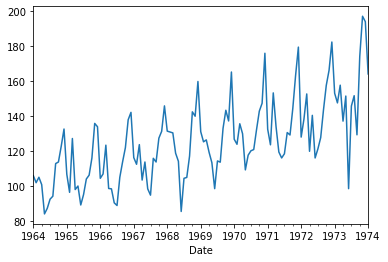

In [19]:
dataframe['Demand'].plot()

In [20]:
year1 = dataframe[(dataframe['Date'] > '1964-01-01') & (dataframe['Date'] <= '1968-01-1')].copy()

<AxesSubplot:xlabel='Date'>

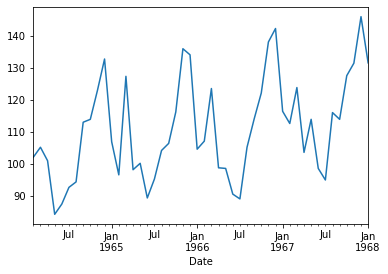

In [21]:
year1['Demand'].plot()

In [35]:
decomposition = seasonal_decompose(demand,freq=1)


<ipython-input-35-983473b83375>:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  decomposition = seasonal_decompose(demand,freq=1)


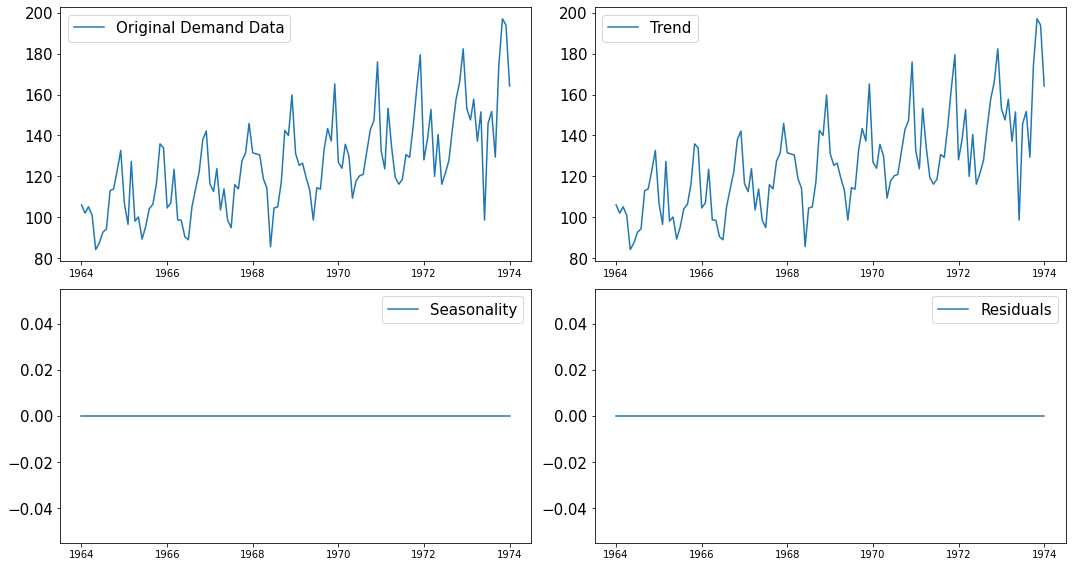

In [36]:
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(15, 8))

plt.subplot(2,2,1)
plt.plot(demand, label='Original Demand Data')
plt.legend(loc='best', fontsize = 15)
plt.tick_params(axis='y', which='major', labelsize=15)

plt.subplot(2,2,2)
plt.plot(trend, label='Trend')
plt.legend(loc='best', fontsize = 15)
plt.tick_params(axis='y', which='major', labelsize=15)

plt.subplot(2,2,3)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best', fontsize = 15)
plt.tick_params(axis='y', which='major', labelsize=15)

plt.subplot(2,2,4)
plt.plot(residual, label='Residuals')
plt.legend(loc='best', fontsize = 15)
plt.tick_params(axis='y', which='major', labelsize=15)
plt.tight_layout()

In [24]:
from statsmodels.tsa.stattools import adfuller

In [25]:
x = dataframe['Demand'].values

In [26]:
result = adfuller(x)

In [27]:
print("ADF statistics: %f" % result[0])
print("p-value: %f" % result[1])
print('Critical Values:')
for key,value in result[4].items():
    print('\t%s: %.3f' % (key, value))
    
if result[0] < result[4]["5%"]:
    print('Time series is stationary')
else:
    print('Time series is not stationary')

ADF statistics: 1.990182
p-value: 0.998660
Critical Values:
	1%: -3.493
	5%: -2.889
	10%: -2.581
Time series is not stationary


In [33]:
decomposition2 = seasonal_decompose(demand,model = 'multiplicative',period= 12)


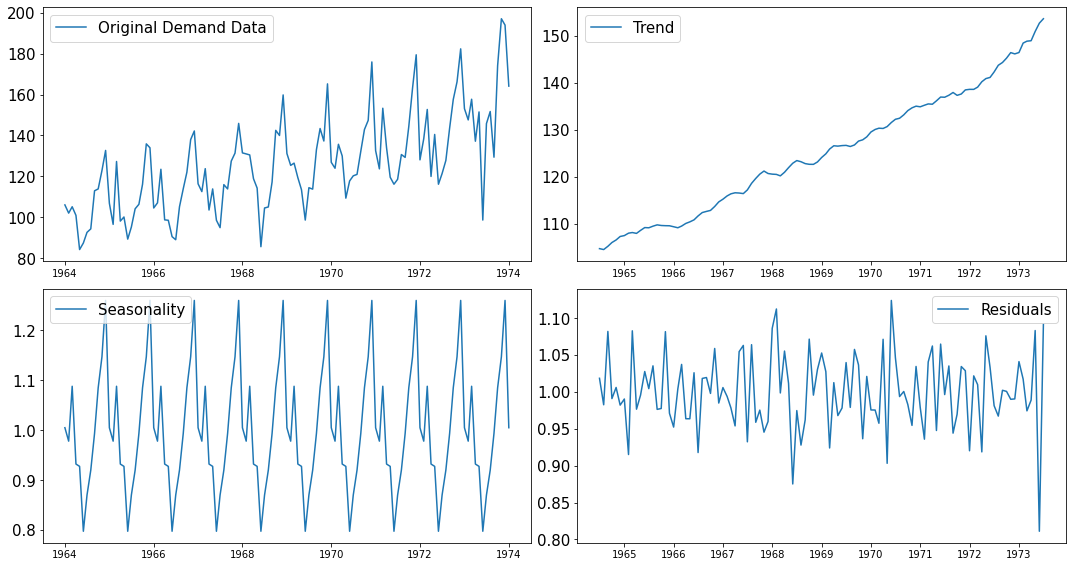

In [34]:
trend = decomposition2.trend
seasonal = decomposition2.seasonal
residual = decomposition2.resid

plt.figure(figsize=(15, 8))

plt.subplot(2,2,1)
plt.plot(demand, label='Original Demand Data')
plt.legend(loc='best', fontsize = 15)
plt.tick_params(axis='y', which='major', labelsize=15)

plt.subplot(2,2,2)
plt.plot(trend, label='Trend')
plt.legend(loc='best', fontsize = 15)
plt.tick_params(axis='y', which='major', labelsize=15)

plt.subplot(2,2,3)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best', fontsize = 15)
plt.tick_params(axis='y', which='major', labelsize=15)

plt.subplot(2,2,4)
plt.plot(residual, label='Residuals')
plt.legend(loc='best', fontsize = 15)
plt.tick_params(axis='y', which='major', labelsize=15)
plt.tight_layout()

In [31]:
decomposition3 = seasonal_decompose(demand,model = 'additive',period= 1)


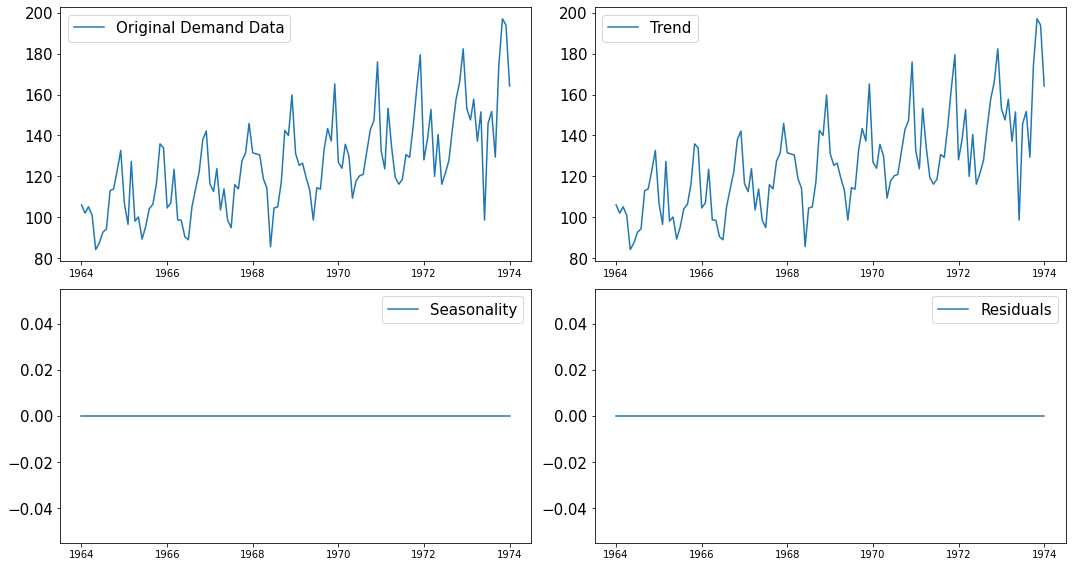

In [32]:
trend = decomposition3.trend
seasonal = decomposition3.seasonal
residual = decomposition3.resid

plt.figure(figsize=(15, 8))

plt.subplot(2,2,1)
plt.plot(demand, label='Original Demand Data')
plt.legend(loc='best', fontsize = 15)
plt.tick_params(axis='y', which='major', labelsize=15)

plt.subplot(2,2,2)
plt.plot(trend, label='Trend')
plt.legend(loc='best', fontsize = 15)
plt.tick_params(axis='y', which='major', labelsize=15)

plt.subplot(2,2,3)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best', fontsize = 15)
plt.tick_params(axis='y', which='major', labelsize=15)

plt.subplot(2,2,4)
plt.plot(residual, label='Residuals')
plt.legend(loc='best', fontsize = 15)
plt.tick_params(axis='y', which='major', labelsize=15)
plt.tight_layout()

In [39]:
dataframe['Demand_diff'] = dataframe['Demand'] - dataframe['Demand'].shift(1) 

<AxesSubplot:xlabel='Date'>

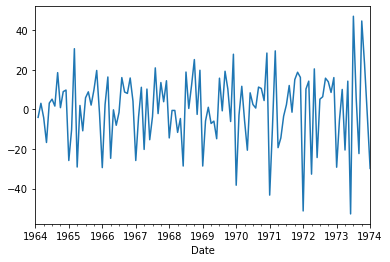

In [40]:
dataframe['Demand_diff'].plot()

In [54]:
dataframe.dropna(inplace = True)

In [55]:
dataframe

,Date,Demand,year,month,Demand_diff
Date,,,,,
1964-02-01,1964-02-01,102.1,1964,2,-4.0
1964-03-01,1964-03-01,105.2,1964,3,3.1
1964-04-01,1964-04-01,101.0,1964,4,-4.2
1964-05-01,1964-05-01,84.3,1964,5,-16.7
1964-06-01,1964-06-01,87.5,1964,6,3.2
...,...,...,...,...,...
1973-09-01,1973-09-01,129.4,1973,9,-22.3
1973-10-01,1973-10-01,174.1,1973,10,44.7
1973-11-01,1973-11-01,197.0,1973,11,22.9


In [56]:
dataframe['Demand_diff']

Date
1964-02-01    -4.0
1964-03-01     3.1
1964-04-01    -4.2
1964-05-01   -16.7
1964-06-01     3.2
              ... 
1973-09-01   -22.3
1973-10-01    44.7
1973-11-01    22.9
1973-12-01    -3.1
1974-01-01   -29.8
Name: Demand_diff, Length: 120, dtype: float64

In [57]:
y = dataframe['Demand_diff'].values

In [58]:
result = adfuller(y)

In [59]:
print("ADF statistics: %f" % result[0])
print("p-value: %f" % result[1])
print('Critical Values:')
for key,value in result[4].items():
    print('\t%s: %.3f' % (key, value))
    
if result[0] < result[4]["5%"]:
    print('Time series is stationary')
else:
    print('Time series is not stationary')

ADF statistics: -4.599136
p-value: 0.000130
Critical Values:
	1%: -3.494
	5%: -2.889
	10%: -2.582
Time series is stationary
